In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Árvores de Decisão e Seleção de Atributos

vantagem das arvores é que sabemos os criterios que o sistema utilizaou para fazer a classificação

### Partições



![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/DecisionTreePartitions.png?raw=true)


## Dicionário

* Partições puras -> nó com apenas um valor categórico||entropia 0 (possuem apenas um elemento)
* Nó terminal -> chega a uma conclusão
* ganho de informação baseado em entropia


## Criando uma Arvore de decisão

In [3]:
# Exemplo livremente adaptado de:
# Weinberger, Kilian. **Machine Learning for Intelligent Systems**, Lecture 28: Decision / Regression Trees
#

df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/comics.csv',sep=';')
display(df)

cases = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/comics_cases.csv',sep=';')
display(cases)

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batman,male,no,no,yes,yes,yes,good
1,Robin,male,no,no,yes,yes,yes,good
2,Catwoman,female,no,no,yes,no,yes,bad
3,Joker,male,no,no,no,no,no,bad
4,Alfred,male,no,yes,no,no,no,good
5,Penguin,male,yes,yes,no,no,no,bad


,Name,sex,smokes,tie,mask,cape,ears,class
0,Batgirl,female,yes,yes,no,yes,no,?
1,Riddler,male,yes,no,no,no,no,?



![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/DecisionTree3.png?raw=true)



![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/DecisionTree1.png?raw=true)


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df.drop(columns=['Name','class']).apply(LabelEncoder().fit_transform)
cases_labels = cases.drop(columns=['Name','class']).apply(LabelEncoder().fit_transform)

display( pd.concat([df.Name, df_labels, df['class']], axis=1) )
display( pd.concat([cases.Name, cases_labels, cases['class']], axis=1) )

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batman,1,0,0,1,1,1,good
1,Robin,1,0,0,1,1,1,good
2,Catwoman,0,0,0,1,0,1,bad
3,Joker,1,0,0,0,0,0,bad
4,Alfred,1,0,1,0,0,0,good
5,Penguin,1,1,1,0,0,0,bad


,Name,sex,smokes,tie,mask,cape,ears,class
0,Batgirl,0,0,1,0,1,0,?
1,Riddler,1,0,0,0,0,0,?


## Criando a Arvore de decisão

In [5]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['class']

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


In [6]:
y_pred = clf.predict(cases_labels)
cases['class'] = y_pred
display( cases )

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batgirl,female,yes,yes,no,yes,no,good
1,Riddler,male,yes,no,no,no,no,bad


### Ver árvore 

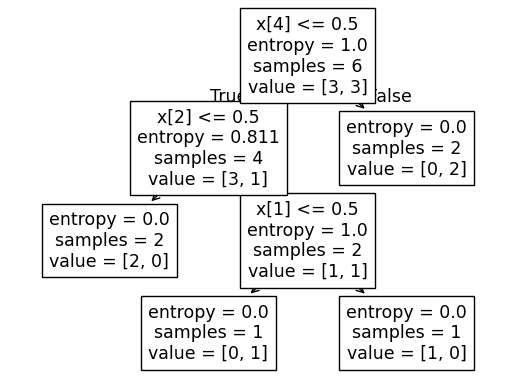

In [7]:
from sklearn import tree

tree.plot_tree(clf)
plt.show()

In [10]:
!pip install graphviz --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.8 MB/s eta 0:00:00


In [11]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=list(df_labels.columns.values),
                     class_names=list(sorted(df['class'].unique())),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('graph_cartoons') # para gravação em .pdf
graph

InvalidParameterError: The 'label' parameter of export_graphviz must be a str among {'root', 'none', 'all'}. Got None instead.

In [12]:
df_tree = pd.concat([df_labels, df['class']], axis=1)

print('Root level')
print(60*'-')
display(df_tree)
print('Continue Next Level...')
display(df_tree[df_tree.cape<=0.5])
print('Terminal')
display(df_tree[df_tree.cape>0.5])

print('\n\n\nSecond level')
print(60*'-')
display(df_tree[df_tree.cape<=0.5])
print('Continue Next Level...')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5)])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie<=0.5)])

print('\n\n\nThird level')
print(60*'-')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5)])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5) & (df_tree.smokes<=0.5) ])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5) & (df_tree.smokes>0.5)])

Root level
------------------------------------------------------------


,sex,smokes,tie,mask,cape,ears,class
0,1,0,0,1,1,1,good
1,1,0,0,1,1,1,good
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Continue Next Level...


,sex,smokes,tie,mask,cape,ears,class
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Terminal


,sex,smokes,tie,mask,cape,ears,class
0,1,0,0,1,1,1,good
1,1,0,0,1,1,1,good





Second level
------------------------------------------------------------


,sex,smokes,tie,mask,cape,ears,class
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Continue Next Level...


,sex,smokes,tie,mask,cape,ears,class
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Terminal


,sex,smokes,tie,mask,cape,ears,class
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad





Third level
------------------------------------------------------------


,sex,smokes,tie,mask,cape,ears,class
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Terminal


,sex,smokes,tie,mask,cape,ears,class
4,1,0,1,0,0,0,good


Terminal


,sex,smokes,tie,mask,cape,ears,class
5,1,1,1,0,0,0,bad


### Entropia e Ganho de Informação


Na teoria da informação, a entropia é uma medida de quantidade de informação introduzido por Claude Shannon em seu artigo de 1948 *A Mathematical Theory of Communication*. A entropia de um atributo é o nível médio de informação, surpresa,  ou  ainda incerteza, inerente aos resultados possíveis desse atributo. Ela é definida como:

$$ E(s) = - \sum_i p_i log p_i $$

onde $p_i$ é a probabilidade dos $i$ valores de $s$.

Um *bit*, por exemplo, é a unidade de informação exatamente por que carrega *1* de entropia:      

$$ E(bit) = - p(0) log( p(0) ) - p(1) log( p(1) )  = - \frac{1}{2} log \frac{1}{2} - \frac{1}{2} log \frac{1}{2} = 1  $$

onde $p(0)$ e $p(1)$ são respectivamente as probabilidades do bit $0$ e $1$.

Assim, podemos ver também que a entropia de uma constante é zero, pois não há qualquer incerteza sobre seu valor:     

$$ E(cte) = - 1 log 1 = 0 $$

e é exatamente isso que queremos buscar em um particionamento ao construírmos uma árvore de decisão.

Podemos empregar o pacote `scipy` para determinar a entropia de dados com base nas probabilidades dos diferentes valores e, abaixo, você pode ver a entropia do *bit* e de uma constante.






In [13]:
from scipy.stats import entropy
E = entropy( [1/2, 1/2] , base=2 )
E

np.float64(1.0)

In [14]:
E = entropy( 1 , base=2 )
E

np.float64(0.0)

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/EntropiaGanhoInformacao.png?raw=true)

<small>
<b>
Figura 6. Exemplo do Cálculo de Entropia e Ganho de Informação.

### Removendo dados com pouca variância

O `VarianceThreshold` permite remover todos os atributos com variância abaixo de um limite e, por padrão, remove todos atributos de variância zero (mesmo valor em todas as amostras), são os dados que não carregam nenhuma informação ou, como você viu entropia $E(cte) = 0$. O


In [18]:
df_tree.drop(columns=['class']).var()

sex       0.166667
smokes    0.166667
tie       0.266667
mask      0.300000
cape      0.266667
ears      0.300000
dtype: float64

In [16]:
from sklearn.feature_selection import VarianceThreshold

X = df_tree.drop(columns=['class'])
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(X)

array([[1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

### Selecionando atributos com o `SelectKBest`

A seleção univariada de recursos funciona selecionando os melhores atributos com base em testes estatísticos univariados, o que inclui a informação mútua. São 3 métodos, mas que tem o mesmo tipo de princípio:

* `SelectKBest` remove tudo, exceto os atributos de maior pontuação

* `SelectPercentile` remove todos os atributos, exceto a maior porcentagem de pontuação especificada

* `GenericUnivariateSelect`permite realizar a seleção univariada de recursos com uma estratégia configurável

Aplicando o  `SelectKBest` ao nosso exemplo teríamos:

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

X = df_tree.drop(columns=['class'])
y = df_tree['class']

select_features = SelectKBest(mutual_info_classif, k=3).fit(X, y)
print( select_features.get_support() )
print( X.columns[select_features.get_support()] )

X_new = select_features.transform(X)

pd.DataFrame( X_new, columns= X.columns[select_features.get_support()] )

[ True  True False False  True False]
Index(['sex', 'smokes', 'cape'], dtype='object')


,sex,smokes,cape
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,0
4,1,0,0
5,1,1,0
